In [2]:
import sqlite3
import pandas as pd
import xarray as xr
import numpy as np
import time
import matplotlib.pyplot as plt

# 1) Use the data supplied of airport codes (ICAO_airports.csv) and top airports (op_airports.csv) to make a table of 50 most travelled airports in the US and containing relevant information, like name, wikipedia link, latitude, longitude

In [3]:
ICAO_airports = pd.read_csv('ICAO_airports.csv')


In [4]:
top_airports = pd.read_csv('top_airports.csv')

Tables

In [5]:
import sqlite3

connection = sqlite3.connect("/tmp/airports.db")

cursor = connection.cursor()

sql_cmd = """CREATE TABLE airports (id INTEGER PRIMARY KEY AUTOINCREMENT,
    ICAO TEXT, name TEXT, wikipedia_link TEXT, latitude FLOAT, longitude FLOAT)"""

cursor.execute(sql_cmd)

Inserting into database

In [6]:
top_airports['City'][0]

'Atlanta'

In [7]:
import numpy as np
for i in range(len(top_airports['City'])):
#     print(top_airports['Airport'][i])
    ICAO_idx = np.argmax(ICAO_airports['ident'] == top_airports['ICAO'][i])
#     print(ICAO_idx)

    print(ICAO_airports['ident'][ICAO_idx], ICAO_airports['name'][ICAO_idx], ICAO_airports['wikipedia_link'][ICAO_idx], 
         ICAO_airports['latitude_deg'][ICAO_idx],ICAO_airports['longitude_deg'][ICAO_idx])
    role = (ICAO_airports['ident'][ICAO_idx], ICAO_airports['name'][ICAO_idx], "ICAO_airports['wikipedia_link'][ICAO_idx]", 
         ICAO_airports['latitude_deg'][ICAO_idx],ICAO_airports['longitude_deg'][ICAO_idx])
    sql_cmd = ("INSERT INTO airports (ICAO, name, wikipedia_link, latitude, longitude) VALUES" +     
         str(role))
    cursor.execute(sql_cmd)

KATL Hartsfield Jackson Atlanta International Airport http://en.wikipedia.org/wiki/Hartsfield-Jackson_Atlanta_International_Airport 33.6366996765137 -84.4281005859375
KORD Chicago O'Hare International Airport http://en.wikipedia.org/wiki/O'Hare_International_Airport 41.97859955 -87.90480042
KLAX Los Angeles International Airport http://en.wikipedia.org/wiki/Los_Angeles_International_Airport 33.94250107 -118.4079971
KDFW Dallas Fort Worth International Airport http://en.wikipedia.org/wiki/Dallas-Fort_Worth_International_Airport 32.896800994873 -97.0380020141602
KDEN Denver International Airport http://en.wikipedia.org/wiki/Denver_International_Airport 39.8616981506348 -104.672996520996
KJFK John F Kennedy International Airport http://en.wikipedia.org/wiki/John_F._Kennedy_International_Airport 40.63980103 -73.77890015
KSFO San Francisco International Airport http://en.wikipedia.org/wiki/San_Francisco_International_Airport 37.6189994812012 -122.375
KIAH George Bush Intercontinental Housto

Showing contents of created table

In [8]:
sql_cmd = "SELECT * FROM airports "
cursor.execute(sql_cmd)

db_info = cursor.fetchall()
for entry in db_info: 
    print(entry)


(1, 'KATL', 'Hartsfield Jackson Atlanta International Airport', "ICAO_airports['wikipedia_link'][ICAO_idx]", 33.6366996765137, -84.4281005859375)
(2, 'KORD', "Chicago O'Hare International Airport", "ICAO_airports['wikipedia_link'][ICAO_idx]", 41.97859955, -87.90480042)
(3, 'KLAX', 'Los Angeles International Airport', "ICAO_airports['wikipedia_link'][ICAO_idx]", 33.94250107, -118.4079971)
(4, 'KDFW', 'Dallas Fort Worth International Airport', "ICAO_airports['wikipedia_link'][ICAO_idx]", 32.896800994873, -97.0380020141602)
(5, 'KDEN', 'Denver International Airport', "ICAO_airports['wikipedia_link'][ICAO_idx]", 39.8616981506348, -104.672996520996)
(6, 'KJFK', 'John F Kennedy International Airport', "ICAO_airports['wikipedia_link'][ICAO_idx]", 40.63980103, -73.77890015)
(7, 'KSFO', 'San Francisco International Airport', "ICAO_airports['wikipedia_link'][ICAO_idx]", 37.6189994812012, -122.375)
(8, 'KIAH', 'George Bush Intercontinental Houston Airport', "ICAO_airports['wikipedia_link'][ICAO_i

In [9]:
connection.commit()
connection.close()

# 2) Build another table that will hold historical weather information: min/max temperature, relative humidity, and precipitation

# 3) using the data from the xarray/netCDF4 example in class, populate the database from 1990-2000

In [10]:
lower_time_idx = 14610
upper_time_idx = 18264


In [11]:
ICAO_airports

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
0,6523,00A,heliport,Total Rf Heliport,40.070801,-74.933601,11.0,NaN,US,US-PA,Bensalem,no,00A,NaN,00A,NaN,NaN,NaN
1,6524,00AK,small_airport,Lowell Field,59.949200,-151.695999,450.0,NaN,US,US-AK,Anchor Point,no,00AK,NaN,00AK,NaN,NaN,NaN
2,6525,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,NaN,US,US-AL,Harvest,no,00AL,NaN,00AL,NaN,NaN,NaN
3,6526,00AR,heliport,Newport Hospital & Clinic Heliport,35.608700,-91.254898,237.0,NaN,US,US-AR,Newport,no,00AR,NaN,00AR,NaN,NaN,NaN
4,6527,00AZ,small_airport,Cordes Airport,34.305599,-112.165001,3810.0,NaN,US,US-AZ,Cordes,no,00AZ,NaN,00AZ,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43925,27242,ZYTL,large_airport,Zhoushuizi Airport,38.965698,121.539001,107.0,AS,CN,CN-21,Dalian,yes,ZYTL,DLC,NaN,NaN,http://en.wikipedia.org/wiki/Dalian_Zhoushuizi...,Dalian Air Base
43926,27243,ZYTX,large_airport,Taoxian Airport,41.639801,123.483002,198.0,AS,CN,CN-21,Shenyang,yes,ZYTX,SHE,NaN,NaN,http://en.wikipedia.org/wiki/Shenyang_Taoxian_...,NaN
43927,27244,ZYYJ,medium_airport,Yanji Chaoyangchuan Airport,42.882801,129.451004,624.0,AS,CN,CN-22,Yanji,yes,ZYYJ,YNJ,NaN,NaN,http://en.wikipedia.org/wiki/Yanji_Chaoyangchu...,NaN
43928,32753,ZYYY,medium_airport,Shenyang Dongta Airport,41.784401,123.496002,NaN,AS,CN,CN-21,Shenyang,no,ZYYY,NaN,NaN,NaN,NaN,NaN


In [12]:
datatype = "tasmax" 

data_path = ("http://thredds.northwestknowledge.net:8080/"
             f"thredds/dodsC/agg_macav2metdata_{datatype}"
             "_BNU-ESM_r1i1p1_historical_1950_2005_CONUS_daily.nc"
            )

max_temp_xr  = xr.open_dataset(data_path)  

datatype = "tasmin" 

data_path = ("http://thredds.northwestknowledge.net:8080/"
             f"thredds/dodsC/agg_macav2metdata_{datatype}"
             "_BNU-ESM_r1i1p1_historical_1950_2005_CONUS_daily.nc"
            )

min_temp_xr  = xr.open_dataset(data_path)  

datatype = "pr" 

data_path = ("http://thredds.northwestknowledge.net:8080/"
             f"thredds/dodsC/agg_macav2metdata_{datatype}"
             "_BNU-ESM_r1i1p1_historical_1950_2005_CONUS_daily.nc"
            )

pr_xr  = xr.open_dataset(data_path)  

datatype = "rhsmax" 

data_path = ("http://thredds.northwestknowledge.net:8080/"
             f"thredds/dodsC/agg_macav2metdata_{datatype}"
             "_BNU-ESM_r1i1p1_historical_1950_2005_CONUS_daily.nc"
            )

rh_xr  = xr.open_dataset(data_path)  


Airport longitude doublecheck

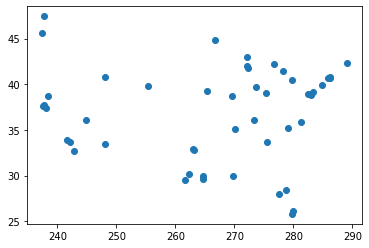

In [13]:
long_list =[]
lat_list =[]
for i in range(len(top_airports['City'])):
    ICAO_idx = np.argmax(ICAO_airports['ident'] == top_airports['ICAO'][i])
#     print(ICAO_idx)
    latitude_deg = ICAO_airports['latitude_deg'][ICAO_idx]
    longitude_deg = ICAO_airports['longitude_deg'][ICAO_idx]

    if longitude_deg < 0:
        longitude_deg = 360 + longitude_deg
    if latitude_deg < 0:
        latitude_deg += 360
    if (longitude_deg < rh_xr['lon'].values[-1] and longitude_deg > rh_xr['lon'].values[0]) and (latitude_deg < rh_xr['lat'].values[-1] and latitude_deg > rh_xr['lat'].values[0]):

        long_list.append(longitude_deg)
        lat_list.append(latitude_deg)
plt.scatter(long_list, lat_list)

Table

In [36]:
# !rm "/tmp/test_weather.db"
connection = sqlite3.connect("/tmp/test_weather.db")

cursor = connection.cursor()
# sql_cmd = """CREATE TABLE test_weather (id INTEGER PRIMARY KEY AUTOINCREMENT, 
#     ICAO TEXT, date TEXT, min_temperature array, max_temperature array, relative_humidity array, preciptation array)"""

# cursor.execute(sql_cmd)


In [31]:
for i in range(len(top_airports['City'])):
    ICAO_idx = np.argmax(ICAO_airports['ident'] == top_airports['ICAO'][i])
    latitude_deg = ICAO_airports['latitude_deg'][ICAO_idx]
    longitude_deg = ICAO_airports['longitude_deg'][ICAO_idx]

    if longitude_deg < 0:
        longitude_deg = 360 + longitude_deg
    if latitude_deg < 0:
        latitude_deg += 360

    if (longitude_deg < rh_xr['lon'].values[-1] and longitude_deg > rh_xr['lon'].values[0]) and (latitude_deg < rh_xr['lat'].values[-1] and latitude_deg > rh_xr['lat'].values[0]):
        ICAO_code = ICAO_airports['ident'][ICAO_idx]
    
        print(ICAO_code, time.ctime())
        lat_idx = np.argmin(np.abs(rh_xr['lat'].values- latitude_deg))
        lon_idx = np.argmin(np.abs(rh_xr['lon'].values- longitude_deg))
        closest_lat = rh_xr['lat'].values[lat_idx]
        closest_lon = rh_xr['lon'].values[lon_idx]
        date = rh_xr['time']
        max_temp = max_temp_xr["air_temperature"].sel(lat=closest_lat,
                                           lon=closest_lon)
        min_temp = min_temp_xr['air_temperature'].sel(lat=closest_lat,
                                           lon=closest_lon)
        pr = pr_xr['precipitation'].sel(lat=closest_lat,
                                           lon=closest_lon)
        rh = rh_xr['relative_humidity'].sel(lat=closest_lat,
                                           lon=closest_lon)

        
        for j in range(len(rh_xr['time'][lower_time_idx:upper_time_idx])-1):
            date_value = date[lower_time_idx+j].values
            max_temp_value = max_temp[lower_time_idx+j].values
            min_temp_value = min_temp[lower_time_idx+j].values
            pr_value = pr[lower_time_idx+j].values
            rh_value = rh[lower_time_idx+j].values

            role = (ICAO_code, str(date_value), min_temp_value.item(), max_temp_value.item(), rh_value.item(), pr_value.item())
            print(role, j)
            sql_cmd = "INSERT INTO test_weather (ICAO, date, min_temperature, max_temperature, relative_humidity, preciptation) VALUES " + str(role)
            cursor.execute(sql_cmd)
        print(ICAO_code, time.ctime())



KATL Tue Mar  8 01:39:34 2022
('KATL', '1990-01-01T00:00:00.000000000', 273.0995788574219, 293.6379089355469, 67.15652465820312, 0.0) 0
('KATL', '1990-01-02T00:00:00.000000000', 274.79522705078125, 295.29486083984375, 62.87046813964844, 0.0) 1
('KATL', '1990-01-03T00:00:00.000000000', 278.93853759765625, 288.0876159667969, 80.87677764892578, 7.232409477233887) 2
('KATL', '1990-01-04T00:00:00.000000000', 280.66754150390625, 287.15179443359375, 79.01657104492188, 12.500265121459961) 3
('KATL', '1990-01-05T00:00:00.000000000', 276.63812255859375, 281.25531005859375, 81.73420715332031, 2.3878254890441895) 4
('KATL', '1990-01-06T00:00:00.000000000', 273.8515930175781, 279.25860595703125, 79.99336242675781, 0.0) 5
('KATL', '1990-01-07T00:00:00.000000000', 270.37908935546875, 278.0711364746094, 87.1867904663086, 0.0) 6
('KATL', '1990-01-08T00:00:00.000000000', 272.364013671875, 279.13262939453125, 98.231201171875, 2.23947811126709) 7
('KATL', '1990-01-09T00:00:00.000000000', 277.2859802246094

KeyboardInterrupt: 

In [37]:
sql_cmd = "SELECT * FROM test_weather "
cursor.execute(sql_cmd)

db_info = cursor.fetchall()
for entry in db_info: 
    print(entry)


(1, 'KATL', '1990-01-01T00:00:00.000000000', 273.0995788574219, 293.6379089355469, 67.15652465820312, 0)
(2, 'KATL', '1990-01-02T00:00:00.000000000', 274.79522705078125, 295.29486083984375, 62.87046813964844, 0)
(3, 'KATL', '1990-01-03T00:00:00.000000000', 278.93853759765625, 288.0876159667969, 80.87677764892578, 7.232409477233887)
(4, 'KATL', '1990-01-04T00:00:00.000000000', 280.66754150390625, 287.15179443359375, 79.01657104492188, 12.500265121459961)
(5, 'KATL', '1990-01-05T00:00:00.000000000', 276.63812255859375, 281.25531005859375, 81.73420715332031, 2.3878254890441895)
(6, 'KATL', '1990-01-06T00:00:00.000000000', 273.8515930175781, 279.25860595703125, 79.99336242675781, 0)
(7, 'KATL', '1990-01-07T00:00:00.000000000', 270.37908935546875, 278.0711364746094, 87.1867904663086, 0)
(8, 'KATL', '1990-01-08T00:00:00.000000000', 272.364013671875, 279.13262939453125, 98.231201171875, 2.23947811126709)
(9, 'KATL', '1990-01-09T00:00:00.000000000', 277.2859802246094, 289.15380859375, 89.84674

In [38]:
connection.commit()
connection.close()

NOTE: It looks like it takes ~ 0.5 hour for each airport... Not sure why this is the case. It looks like the creation of the table is correct. 

# 4) For each pair of cities/airports determine how the daily change of temperature high and precipitation from one city predicts the daily change of the other city 1, 3, & 7 days in advance



# 5) Plot the correlation strengths for the 10 top pairs for all three dates, for temperature and precipitation (separately) as a function of distance. Also make a plot as a function of longitude different. What trends do you see?